In [31]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import setup_logging
from extract import MatchDataLoader
from stats import calculate_dominance_metrics, calculate_entry_zone_stats
from transform import get_final_third_entries, get_zone_entries_data
from viz import create_game_summary, plot_final_third_entries

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/dominance_analysis.log")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Load data

In [32]:
# Initialize data loader
loader = MatchDataLoader("../data/20251115-Kazakhstan-Belgium")

# Load all data
events_data, player_data, tracking_data, mapping_data = loader.load_all_data()

2025-11-16 20:36:17,163 - extract.data_loading - INFO - ✓ Loaded 1715 events from ../data/20251115-Kazakhstan-Belgium/events.json
2025-11-16 20:36:17,165 - extract.data_loading - INFO - ✓ Loaded 32 players from ../data/20251115-Kazakhstan-Belgium/events.json
2025-11-16 20:36:17,166 - extract.data_loading - WARNING - Tracking data file not found at ../data/20251115-Kazakhstan-Belgium/tracking.pkl. Returning empty DataFrame.
2025-11-16 20:36:17,169 - extract.data_loading - WARNING - Mapping data file not found at ../data/20251115-Kazakhstan-Belgium/mapping.json. Returning empty dictionary.


In [33]:
events_data.head()

,eventId,playerId,timestamp,playerName,groupId,groupName,teamId,teamName,receiverId,receiverName,receiverTeamId,receiverTeamName,baseTypeId,baseTypeName,subTypeId,subTypeName,resultId,resultName,bodyPartId,bodyPartName,shotTypeId,shotTypeName,foulTypeId,foulTypeName,positionTypeId,positionTypeName,formationTypeId,formationTypeName,partId,partName,startTimeMs,endTimeMs,startPosXM,startPosYM,endPosXM,endPosYM,sequenceId,sequenceEvent,possessionTypeId,possessionTypeName,sequenceStart,sequenceEnd,metrics,labels,descriptives,synced
0,0,-1,1763215200000,NOT_APPLICABLE,1,HOME,16,Kazakhstan,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,17,FORMATION,1700,TEAM_STARTING_FORMATION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
1,1,-1,1763215200000,NOT_APPLICABLE,2,AWAY,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,17,FORMATION,1700,TEAM_STARTING_FORMATION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
2,2,2366,1763215200000,Temirlan Anarbekov,1,HOME,16,Kazakhstan,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,18,POSITION,1800,PLAYER_STARTING_POSITION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,0,GK,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
3,3,324,1763215200000,Nuraly Alip,1,HOME,16,Kazakhstan,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,18,POSITION,1800,PLAYER_STARTING_POSITION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,4,CB,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
4,4,589,1763215200000,Alibek Kasym,1,HOME,16,Kazakhstan,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,18,POSITION,1800,PLAYER_STARTING_POSITION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,4,CB,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False


# 2. Dominance analysis

In [34]:
metrics_df = calculate_dominance_metrics(events_data, "Kazakhstan", "Belgium")
metrics_df.head()

,team,possession,field_tilt,successful_passes,final_third_entries,box_touches,progressive_passes,pp_ratio,pp_outside_final_third,pp_in_final_third,xG,total_shots,on_target_shots,blocked_shots,ppda
0,Kazakhstan,25.42,16.96,143,15,2,68,0.475524,29,39,0.47,9,3,3,10.10
1,Belgium,74.58,83.04,584,91,30,212,0.363014,79,133,2.78,22,8,6,2.19


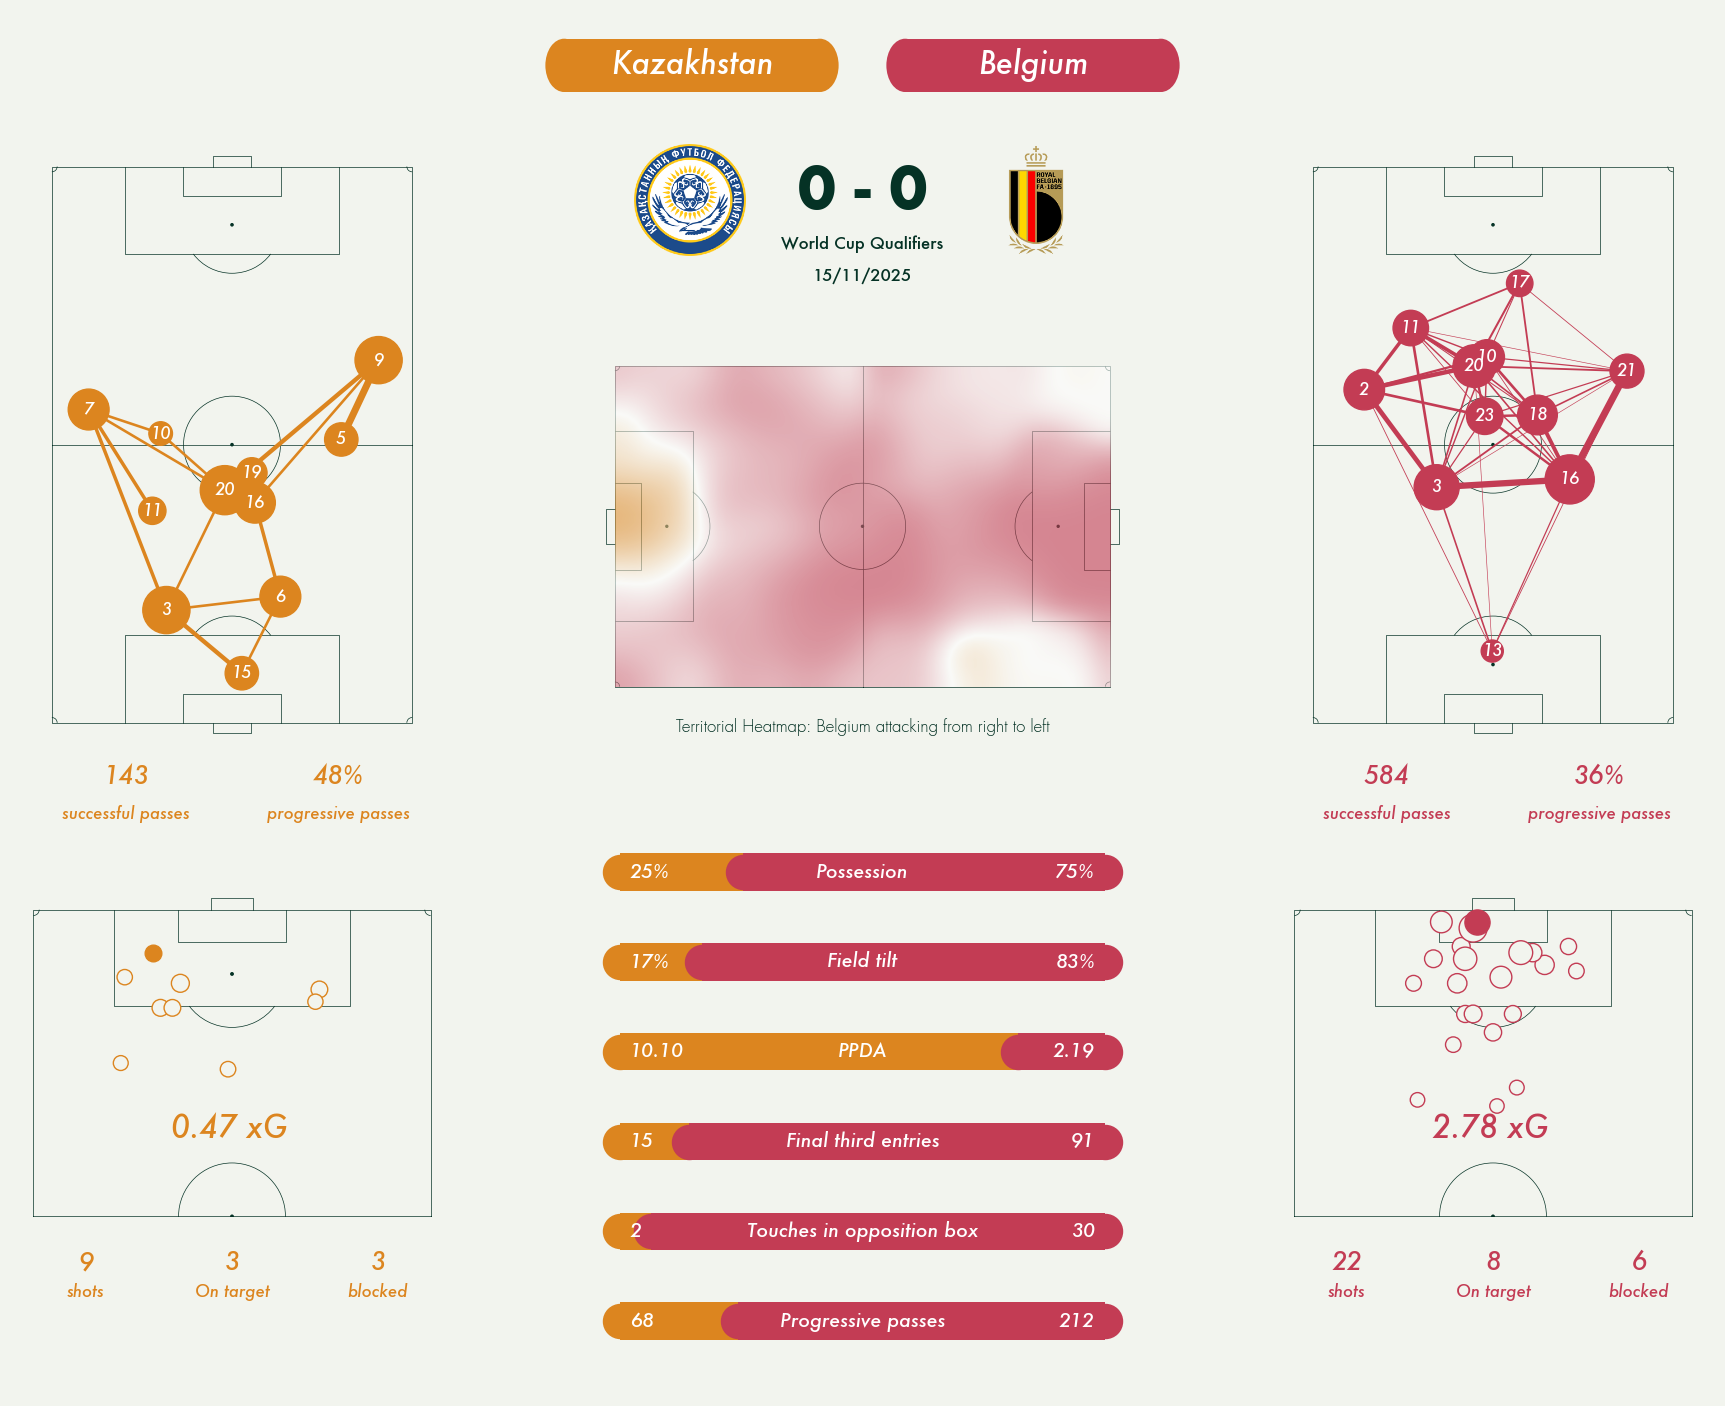

In [35]:
fig = create_game_summary(events_data, player_data, "Kazakhstan", "mkd_color", "Belgium", "bel_color", metrics_df, "15/11/2025")
fig.show()

# 3. Zone entry analysis

In [36]:
final_third_entries = get_final_third_entries(events_data)
final_third_entries.head()

,eventId,timestamp,teamName,baseTypeName,subTypeName,resultName,startPosXM,endPosXM,startPosYM,endPosYM,sequenceId
25,25,1763215204180,Belgium,PASS,PASS,SUCCESSFUL,-25.20,22.05,-0.68,20.40,1
31,31,1763215213430,Belgium,PASS,PASS,SUCCESSFUL,8.40,18.90,15.64,14.28,1
48,48,1763215245319,Belgium,PASS,PASS,SUCCESSFUL,5.25,23.10,14.28,29.24,3
50,50,1763215247579,Belgium,PASS,PASS,SUCCESSFUL,8.40,18.90,30.60,23.12,3
54,54,1763215272200,Belgium,PASS,PASS,SUCCESSFUL,11.55,19.95,-15.64,-30.60,3


In [37]:
entries_df = get_zone_entries_data(final_third_entries, events_data, "Belgium")
entries_df.head()

,eventId,timestamp,teamName,baseTypeName,subTypeName,resultName,startPosXM,endPosXM,startPosYM,endPosYM,sequenceId,entry_zone,outcome,box_entry,box_entry_count,shot,shot_count,goal,goal_count,total_xg,turnover,recycled
25,25,1763215204180,Belgium,PASS,PASS,SUCCESSFUL,-25.20,22.05,-0.68,20.40,1,left,"{'box_entry': False, 'box_entry_count': 0, 'sh...",False,0,False,0,False,0,0.0,False,True
31,31,1763215213430,Belgium,PASS,PASS,SUCCESSFUL,8.40,18.90,15.64,14.28,1,left,"{'box_entry': True, 'box_entry_count': 1, 'sho...",True,1,False,0,False,0,0.0,False,False
48,48,1763215245319,Belgium,PASS,PASS,SUCCESSFUL,5.25,23.10,14.28,29.24,3,left,"{'box_entry': False, 'box_entry_count': 0, 'sh...",False,0,False,0,False,0,0.0,False,True
50,50,1763215247579,Belgium,PASS,PASS,SUCCESSFUL,8.40,18.90,30.60,23.12,3,left,"{'box_entry': False, 'box_entry_count': 0, 'sh...",False,0,False,0,False,0,0.0,False,False
54,54,1763215272200,Belgium,PASS,PASS,SUCCESSFUL,11.55,19.95,-15.64,-30.60,3,right,"{'box_entry': False, 'box_entry_count': 0, 'sh...",False,0,False,0,False,0,0.0,False,True


In [38]:
zone_stats = calculate_entry_zone_stats(entries_df)
zone_stats.head()

,entry_zone,total_entries,entries_with_shot,total_shots,shot_rate,total_xg,xg_per_entry,xg_per_shot,entries_with_box_entry,total_box_entries,box_entry_rate,total_turnovers,turnover_rate,total_recycles,recycle_rate
0,center,17,1,1,5.882353,0.325,0.019118,0.325000,5,5,29.411765,2,11.764706,6,35.294118
1,left,43,6,6,13.953488,1.120,0.026047,0.186667,16,17,37.209302,6,13.953488,12,27.906977
2,right,31,5,5,16.129032,0.650,0.020968,0.130000,11,12,35.483871,6,19.354839,8,25.806452


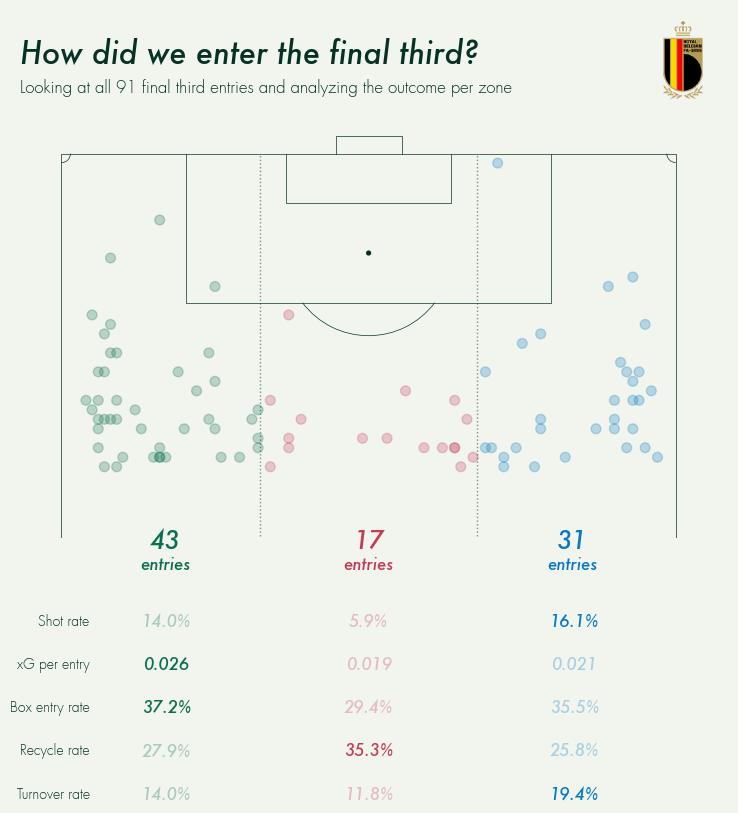

In [42]:
fig = plot_final_third_entries(entries_df, zone_stats, "Belgium")
fig.show()